#**TASK-2-MOVIE RATING PREDICTION WITH PYTHON**

# Download Data From Kaggle


In [100]:
!pip install kaggle

In [101]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download adrianmcmahon/imdb-india-movies

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies
License(s): CC0-1.0
imdb-india-movies.zip: Skipping, found more recently modified local copy (use --force to force download)


# Extracting a ZIP File

In [102]:
from zipfile import ZipFile
dataset = '//content/imdb-india-movies.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


# Import Libaries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [104]:
df = pd.read_csv('/content/IMDb_Movies_India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Basic Information & Statistics

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [106]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [107]:
df.shape

(15509, 10)

# Handling Missing Values

In [108]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [109]:
per_missing = (df.isnull().sum() *100 / len(df)).round(2)
per_missing

,0
Name,0.00
Year,3.40
Duration,53.32
Genre,12.10
Rating,48.94
Votes,48.93
Director,3.39
Actor 1,10.43
Actor 2,15.37
Actor 3,20.27


In [110]:
# Drop missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [111]:
# Convert data types
df['Year'] = df['Year'].astype(str).str.extract('(\d+)').astype(float)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

# Feature Engineering

In [112]:
df['popularity_score'] = np.log1p(df['Votes'])
df['genre_Avg_rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['director_Avg_rating'] = df.groupby('Director')['Rating'].transform('mean')

df['Actor1_Average_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_Average_Rating']= df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =  df.groupby('Actor 3')['Rating'].transform('mean')

# Select Features


In [113]:
features = ['Year','Votes', 'Duration', 'popularity_score', 'genre_Avg_rating', 'director_Avg_rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']
df = df[features + ['Rating']].dropna()

# Splitting the Dataset

In [114]:
X = df[features]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Model - Linear Regression

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model

In [117]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.4083
R² Score: 0.7795


# Visualizing Linear Regression: Actual vs. Predicted Ratings

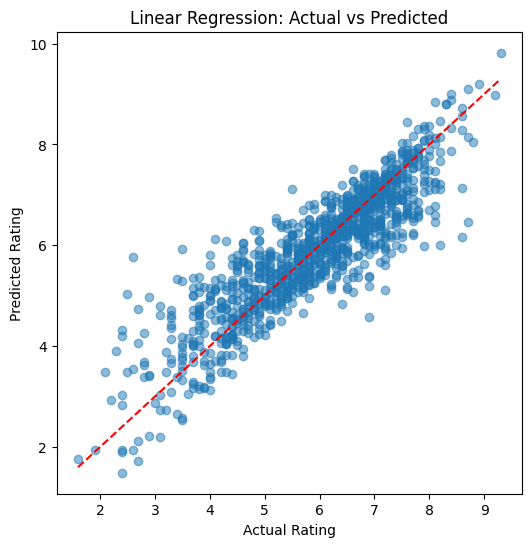

In [118]:
# Plot actual vs predicted ratings
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()